In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
from google.colab import files
import pandas as pd
uploaded = files.upload()



Saving Churn_Modelling.csv to Churn_Modelling.csv


In [5]:
# Get the uploaded filename (Colab stores it in a dictionary)
filename = list(uploaded.keys())[0]

# Load into pandas
df = pd.read_csv(filename)

# Preview the data
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Dataset shape (rows, columns)
print(df.shape)

# Column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber          0
CustomerId         0
Surname            0
CreditScore   

In [7]:
churn_rate = df['Exited'].value_counts(normalize=True) * 100
print(churn_rate)


Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


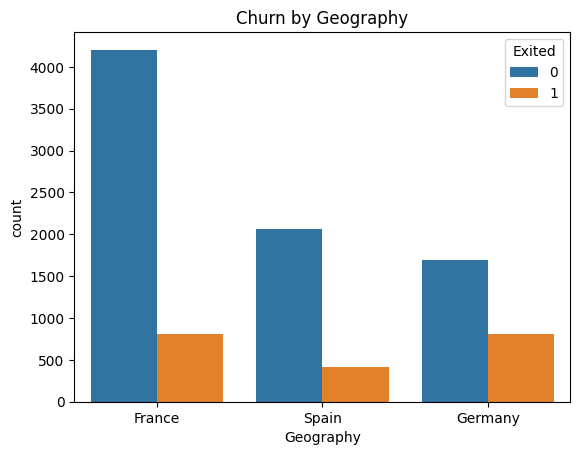

In [8]:
#Churn rate by geographical region
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Churn by Geography')
plt.show()


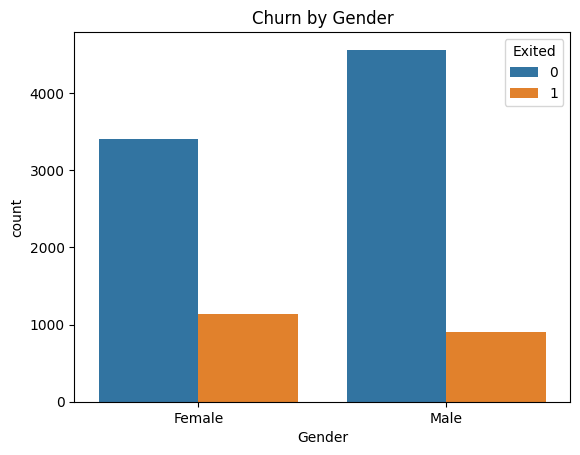

In [9]:
#Churn Rate by Gender
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Churn by Gender')
plt.show()


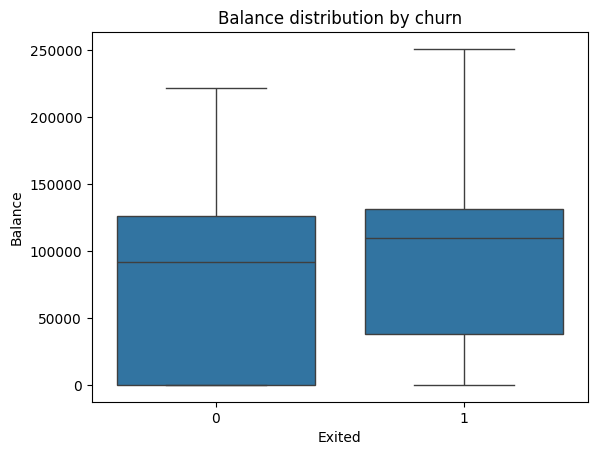

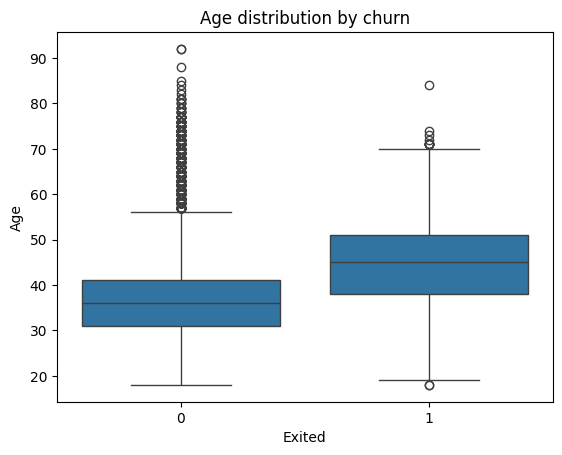

In [10]:
#Churn relationship with Age & Balance
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title('Balance distribution by churn')
plt.show()

sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Age distribution by churn')
plt.show()


DATA PRE-PORCESSING

In [11]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


In [12]:
# One-hot encode Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Encode Gender as 0/1
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


In [13]:
#Splitting for training
X = df.drop('Exited', axis=1)
y = df['Exited']


In [14]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


CUSTOMER CHURN MODEL-(Random Forest Model)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8665

Confusion Matrix:
 [[1551   56]
 [ 211  182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



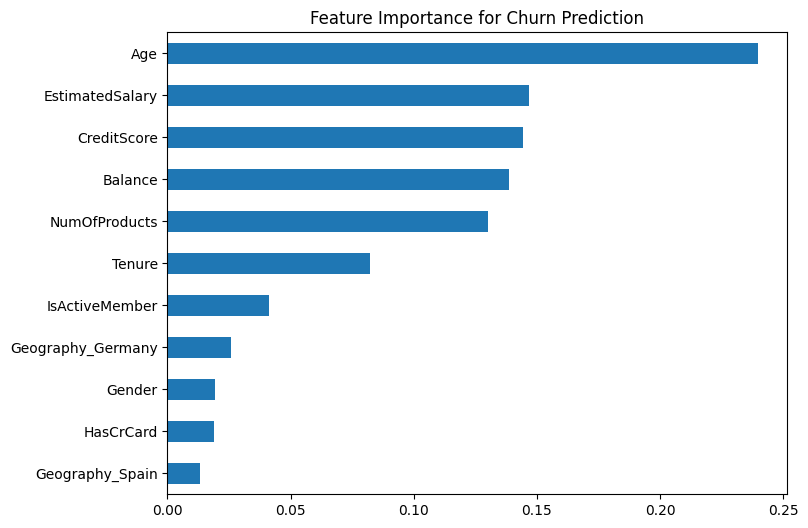

In [17]:
#Business Inisghts
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance for Churn Prediction")
plt.show()


POWER BI PREPARATION

In [20]:
# First, scale the entire feature set
X_scaled = scaler.fit_transform(X)

# Predict churn for all rows
df['Predicted_Churn'] = rf.predict(X_scaled)

# Export for Power BI
df.to_csv('churn_analysis_ready.csv', index=False)



In [21]:
from google.colab import files
# Export the full DataFrame
df.to_csv('churn_analysis_ready.csv', index=False)
files.download('churn_analysis_ready.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>